# Diving deep with imbalanced data [1]
## Learn the tecnhiques to deal with an imbalanced dataset

* What is imbalanced data?
* Imbalanced datasets is a serious problem. Why?
* Accuracy paradox
* Different metrics for classifier evaluation
* Various approaches to handling imbalanced data

### What is imbalanced data?

Imbalanced data typically refers to classification tasks where the classes are not represented equally.

Examples: 
* Binary classification with 100 instances contains 80 labeled with class-1 and 20 labeled with class-2
* The ratio of class-1 to class-2 is 4:1.
* ...

### Imbalanced datasets is a serious problem. Why?

* Machine Learning algorithms have shown great success in many real-world applications.
* **BUT** still the problem of learning from imbalanced data is still yet to be state-of-the-art: **Imbalanced learning.**
* Some significant problems of imbalanced learning:
    * When the dataset has underrepresented data, the class distribution starts skew.
    * Due to the inherent complex characteristics of the dataset, learning from such data requires new understandings, new approaches, new principles, and new tools to transform data. And moreover, this cannot anyway guarantee an efficient solution to your business problem. In worst cases, it might turn to complete wastes with zero residues to reuse.

**Question**: *why in an age of GPUs, TPUs machine learning algorithms are failing to tackle imbalanced data efficiently?* 

**Answer**: Evaluation of machine learning algorithms has a lot to do as to the reason why a particular machine learning algorithm does not perform when supplied with imbalanced data.


### Accuracy paradox

**Example**: Suppose, you have a dataset (associated with a classification task) with two classes with a distribution ratio of 9:1. The total number of instances present in the dataset is 1000, and the class labels are Class-1 and Class-2. Therefore, w.r.t the distribution ratio, the number of instances that correspond to Class-1 is 900 while Class-2 instances are 100. Now, you applied a standard classifier (say Logistic Regression) and measured its performance concerning classification accuracy which gives the number of instances correctly classified by the classifier. Now, take a closer look and think very deeply.

You Logistic Regression model does not have to be very complicated to classify all the 1000 instances as Class-1. In that case, you would get a classification accuracy of 90% which is really not enough to test the actual quality of the classifier. Clearly, you need some other metric to evaluate the performance of the system. You will see that in a minute. The phenomenon you just studied is called **Accuracy Paradox**.

###  Different metrics for classifier evaluation

In this section by studying some metrics other than classification accuracy in order to truly judge a classifier when it is dealing with imbalanced data.

First, let's define four fundamental terms here:
* True Positive (TP) – An instance that is positive and is classified correctly as positive
* True Negative (TN) – An instance that is negative and is classified correctly as negative
* False Positive (FP) – An instance that is negative but is classified wrongly as positive
* False Negative (FN) – An instance that is positive but is classified incorrectly as negative

The following image will justify the above terms for themselves:
![title](img/img1.png)

Now, assume that you trained another classifier on the toy dataset you just saw and this time you applied a Random Forest. And you got a classification accuracy of 70%. Now that, you know about True Positive and Negative Rates and False Positive and Negative Rates, you will investigate the performance of the earlier Logistic Regression and Random Forest in a bit more detailed manner.

Suppose you got the following True Positive and Negative Rates and False Positive and Negative Rates for Logistic Regression:
![title](img/img2.png)

Now, assume that the True Positive and Negative Rates and False Positive and Negative Rates for Random Forest are following:
![title](img/img3.png)

Just look at the number of negative classes correctly predicted (True Negatives) by both of the classifiers. As you are dealing with an imbalanced dataset, you need to give this number the most priority (because Class-1 dominant in the dataset). So, considering that, Random Forest trades away Logistic Regression easily.

**Remark**: Remember, the above representation is popularly known as **Confusion Matrix**.

Following are the two terms that are derived from the confusion matrix and very much used when you are evaluating a classifier:
* **Precision**: Precision is the number of True Positives divided by the number of True Positives and False Positives. Put another way; it is the number of positive predictions divided by the total number of positive class values predicted. It is also called the Positive Predictive Value (PPV).

Precision can be thought of as a measure of a classifier's exactness. A low precision can also indicate a large number of False Positives.
* **Recall**: Recall is the number of True Positives divided by the number of True Positives and the number of False Negatives. Put another way it is the number of positive predictions divided by the number of positive class values in the test data. It is also called Sensitivity or the True Positive Rate.

Recall can be thought of as a measure of a classifier's completeness. A low recall indicates many False Negatives.

### Various approaches to handling imbalanced data

Now, we are in an excellent place to study the approaches for combating imbalanced dataset problem.

Before, we begin studying the approaches to tackle class-imbalance problem let's take a very real-world example where just choosing **classification accuracy** as the evaluation metric can produce disastrous results.

**Example**: The `breast cancer dataset` is a standard machine learning dataset. It contains 9 attributes describing 286 women that have suffered and survived breast cancer and whether or not breast cancer recurred within 5 years. Let's investigate this dataset to get you a real feel of the problem.

The dataset concerns a binary classification problem. Of the 286 women, 201 did not suffer a recurrence of breast cancer, leaving the remaining 85 that did.

Let's explore about the dataset more visually.

In [3]:
import numpy as np
import pandas as pd

# Load the dataset into a pandas dataframe
data = pd.read_csv("breast-cancer.data",header=None)

# See the data
print(data.head(10))

                      0      1        2      3    4   5  6      7          8  \
0  no-recurrence-events  30-39  premeno  30-34  0-2  no  3   left   left_low   
1  no-recurrence-events  40-49  premeno  20-24  0-2  no  2  right   right_up   
2  no-recurrence-events  40-49  premeno  20-24  0-2  no  2   left   left_low   
3  no-recurrence-events  60-69     ge40  15-19  0-2  no  2  right    left_up   
4  no-recurrence-events  40-49  premeno    0-4  0-2  no  2  right  right_low   
5  no-recurrence-events  60-69     ge40  15-19  0-2  no  2   left   left_low   
6  no-recurrence-events  50-59  premeno  25-29  0-2  no  2   left   left_low   
7  no-recurrence-events  60-69     ge40  20-24  0-2  no  1   left   left_low   
8  no-recurrence-events  40-49  premeno  50-54  0-2  no  2   left   left_low   
9  no-recurrence-events  40-49  premeno  20-24  0-2  no  2  right    left_up   

    9  
0  no  
1  no  
2  no  
3  no  
4  no  
5  no  
6  no  
7  no  
8  no  
9  no  


The column names are numeric because you are using a partially preprocessed dataset.

Let's see a bar graph of the class distributions.

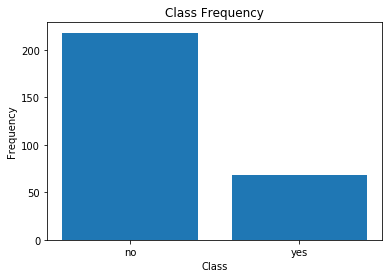

In [6]:
import matplotlib.pyplot as plt

classes = data[9].values
unique, counts = np.unique(classes, return_counts=True)

plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

We can clearly see the class imbalance here. `yes` denotes the instances which have cancer and is obvious, the number of these instances is minimal as compared to the instances corresponding to the other class.

Let's define `No Recurrences` and `Recurrences` event that is there in the dataset which will make things even more evident.
* **All No Recurrence**: A model that only predicted no recurrence of breast cancer would achieve an accuracy of (201/286) * 100 or 70.28%. This is called **All No Recurrence**. This is a high accuracy, but a terrible model. If this model was misinterpreted, it would send home 85 women incorrectly thinking their breast cancer was not going to reoccur (High False Negatives).
* **All recurrence**: A model that only predicted the recurrence of breast cancer would achieve an accuracy of (85/286) * 100 or 29.72%. This is known **All Recurrence**. This model fails at producing good accuracy and would send home 201 women thinking that had a recurrence of breast cancer, but this is not the case (High False Positives).

Now, you have now enough reasons to wonder why considering only classification accuracy to evaluate your classification model is not a good choice.

Let's study some approaches now:

#### Re-sampling the dataset:
Dealing with imbalanced datasets includes various strategies such as improving classification algorithms or balancing classes in the training data (essentially a data preprocessing step) before providing the data as input to the machine learning algorithm. The latter technique is preferred as it has broader application and adaptation. Moreover, the time taken to enhance an algorithm is often higher than to generate the required samples. But for research purposes, both are preferred.

The main idea of sampling classes is to either increasing the samples of the minority class or decreasing the samples of the majority class. This is done in order to obtain a fair balance in the number of instances for both the classes.

There can be two main types of sampling:
* You can add copies of instances from the minority class which is called **over-sampling** (or more formally sampling with replacement), or
* You can delete instances from the majority class, which is called **under-sampling**.

##### Random under-sampling:
When you randomly eliminate instances from the majority class of a dataset and assign it to the minority class (without filling out the void created in majority class), it is known as **random under-sampling**. The void that gets created in the majority dataset for this makes the process random.
* **Advantages of this approach**: 
    * It can help improve the runtime of the model and solve the memory problems by reducing the number of training data samples when the training data set is enormous.
* **Disadvantages**: 
    * It can discard useful information about the data itself which could be necessary for building rule-based classifiers such as Random Forests.
    * The sample chosen by random undersampling may be a biased sample. And it will not be an accurate representation of the population in that case. Therefore, it can cause the classifier to perform poorly on real unseen data.

##### Random over-sampling:
Just like random under-sampling, you can perform random oversampling as well. But in this case, taking any help from the majority class, you increase the instances corresponding to the minority class by replicating them up to a constant degree. In this case, you do not decrease the number of instances assigned to the majority class. Say, you have a dataset with 1000 instances where 980 instances correspond to the majority class, and the reaming 20 instances correspond to the minority class. Now you over-sample the dataset by replicating the 20 instances up to 20 times. As a result, after performing over-sampling the total number of instances in the minority class will be 400.

* **Advantages of random over-sampling**:
    * Unlike undersampling, this method leads to no information loss.
* **Disadvantages:** 
    * It increases the likelihood of overfitting since it replicates the minority class events.
    
You can consider the following factors while thinking of applying under-sampling and over-sampling:
* Consider applying under-sampling when you have a lot of data.
* Consider applying over-sampling when you don’t have a lot of data.
* Consider applying random and non-random (e.g., stratified) sampling schemes
* Consider applying different ratios of the class-labels (e.g., you don’t have to target a 1:1 ratio in a binary classification problem, try other ratios)

# Oversampling with SMOTE and ADASYN

## Introduction

In the above section we discussed random oversampling and undersampling: what they are, how they work, and why they're useful. The literature on sampling imbalanced datasets extends past these "naive" approaches. The `imbalanced-learn` module in `sklearn` includes a number of more advanced sampling algorithms, and I'll discuss the oversampling-related ones here. Most of these work by generate or subsetting new synthetic points.

## Oversampling with SMOTE  [2], [3]

The SMOTE algorithm is one of the first and still the most popular algorithmic approach to generating new dataset samples. The algorithm, introduced and accessibly enough described in a [2002 paper](https://www.jair.org/media/953/live-953-2037-jair.pdf), works by oversampling the underlying dataset with new synthetic points.

The SMOTE algorithm is parameterized with `k_neighbors`  (the number of nearest neighbors it will consider) and the number of new points you wish to create. Each step of the algorithm will:

1. Randomly select a minority point.
2. Randomly select any of its `k_neighbors` nearest neighbors belonging to the same class.
3. Randomly specify a lambda value in the range `[0, 1]`.
4. Generate and place a new point on the vector between the two points, located lambda percent of the way from the original point.

The `imbalanced-learn` documentation includes the following illustration:

![](https://i.imgur.com/yrGAbiR.png)

This is conceptually a very simple algorithm; to quote something a graph theory professor I once had liked to say, you could probably explain how it works to your grandmother.

Let's see what this looks like in practice. Recall the following synthetic sample dataset from the previous notebook:

In [1]:
import seaborn as sns
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)

import matplotlib.pyplot as plt
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.scatter(X[:, 0], X[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE")
pass

When we apply SMOTE to this we get:

In [ ]:
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE().fit_sample(X, y)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE")
pass

The weakness of SMOTE is readily apparent from this quick test. Because the algorithm doesn't have any jitter, for minority class sample clouds with few enough points it tends to result in long "data lines". This results in some very funky looking resultant datasets. Somewhat funny-looking results are actually a trademark of these sampling techniques. For a broad class of data it's actually reasonably easy to tell when someone has used SMOTE on it. But remember, we're just building a new dataset sample. Funny looking results are fine, as long as they actually result in improved classifiers when used as input down the line!

SMOTE has also done something here that I am less comfortable with: it's constructed a "bridge" between the main red point cloud and a handful of outlier points located in the blue cluster. We can see that these new points are quite dense if we zoom in on the structure:

(0, 1.7)

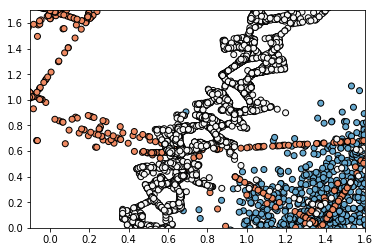

In [3]:
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
ax = plt.gca()
ax.set_xlim([-0.1, 1.6])
ax.set_ylim([0, 1.7])

Why does this happen? This surprising new structure shows up prominently because in the "line constructor" nature of SMOTE, a few of the outlier points inside of the blue point cloud will match up sometimes with points in the main body of the class cluster. These will then get interpolated into long spaghetti lines.

This is an artifact of the SMOTE algorithm, and is problematic because it introduces a feature into the dataset, this "point bridge", which doesn't actually exist in the underlying dataset. We can verify this if we increase the incidence rate for this rare class by 10x in the underlying dataset:

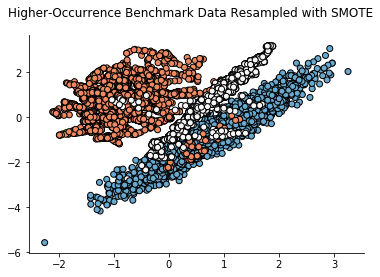

In [4]:
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.10, 0.10, 0.80],
                           class_sep=0.8, random_state=0)
X_resampled, y_resampled = SMOTE().fit_sample(X, y)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Higher-Occurrence Benchmark Data Resampled with SMOTE")
pass

This tendancy of SMOTE to connect inliers and outliers is the algorithm's primary weakness in practice. It limits the algorithm's applicability to datasets with sufficiently few samples and/or sufficiently sparse point clouds. When applying SMOTE to your own data, make sure to take a good hard look at whether or not it's doing what you expect it to be doing.

`imlearn` includes several adaptations of the naive SMOTE algorithm which attempt to address this weakness in various ways. There are in total four "modes" in `imlearn`. The one demonstrated thus far, the classic SMOTE algorithm, corresponds with `kind='regular'`. The remaining three are adaptations.

`kind='borderline1'` and `kind='borderline2'` are one class of adaptations. These will classify points are being noise (all nearest neighbors are of a different class), in danger (half or more nearest neighbors are a different class), or safe (all nearest neighbors are of the same class). Only points in danger will be sampled in step one of the algorithm. Then, on step two of the algorithm, instead of selecting a point from `n_neighbors` belonging to the same class, `borderline1` will select a point from the five nearest points *not* belonging to the given point's class, while `borderline2` will select a point from the five nearest points of *any* class.

Here is what either algorithm looks like in practice:

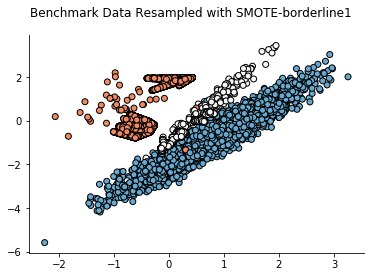

In [5]:
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)

X_resampled, y_resampled = SMOTE(kind='borderline1').fit_sample(X, y)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE-borderline1")
pass

The borderline SMOTE algorithms are so named because they will only sample points on the border. Points that are located in a neighborhood of `n_neighbors` points all of their class are left untouched, so e.g. points inside of the class clusters are never sampled. Similarly, the noisy outlier points located inside of the blue cluster are ignored, solving the innerpoint-outerpoint join problem.

However, as the red cluster demonstrates, as a result SMOTE-borderline will tend to focus extremely heavily on the same relatively small number of points. We have replaced extensions to outliers with extensions from borderline points into their neighborhood. New points created in dense, but not totally homogenous neighborhoods which are essentially jittered versions of existing ones: they are displaced just a small amount from their progenitors. But when boundary points are small in number and distant from the rest of their neighborhood, you once again get somewhat odd-looking results: look at those crazy clusters near the decision boundary in the red group!

In this example the clusters overall still look linearly separable, for example, so we would not expect this to significantly effect the performance of e.g. a Linear SVM. But you should always be careful about checking the effect of your transformations net-net.

Now `borderline2`:

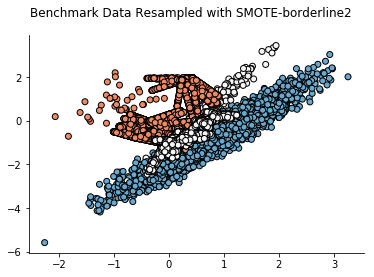

In [6]:
X_resampled, y_resampled = SMOTE(kind='borderline2').fit_sample(X, y)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE-borderline2")
pass

Because `borderline2` allows extending to any point class-wise, it will retain a bit of the stringiness of the regular SMOTE, which may make the result less separable. Otherwise the tradeoffs are the same.

The last option is `kind='svm'`. `imlearn` documentation is very vague as to how this works, simply stating that it "uses an SVM classifier to find support vectors and generate samples considering them":

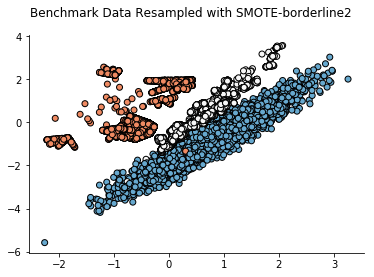

In [7]:
X_resampled, y_resampled = SMOTE(kind='svm').fit_sample(X, y)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE-borderline2")
pass

SVM will again focus sampling on points near the boundaries of the clusters.

## Oversampling with ADASYN

The other oversampling technique implemented in `imlearn` is adaptive synthetic sampling, or ADASYN. ADASYN is similar to SMOTE, and derived from it, featuring just one important difference. it will bias the sample space (that is, the likelihood that any particular point will be chosen for duping) towards points which are located not in homogenous neighborhoods. Applied to our sample data, this results in the following:

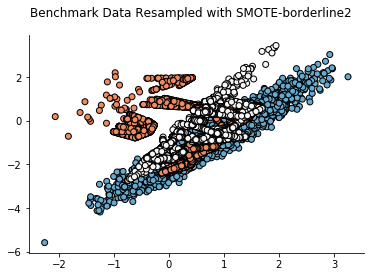

In [8]:
from imblearn.over_sampling import ADASYN

X_resampled, y_resampled = ADASYN().fit_sample(X, y)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE-borderline2")
pass

ADASYN uses (1) the `kind='normal'` SMOTE algorithm (2) on point not in homogenous neighborhoods. The result is a kind of hybrid between regular SMOTE and `borderline1` SMOTE. This technique inherits the primary weakness of SMOTE, e.g. its ability to create innerpoint-outerpoint bridges. Whether or not the heavy focus on the outlier points is a good thing or not is application dependent, but overall ADASYN feels like a *very* heavy transformation algorithm, and e.g. one requiring that the underlying point cluster be sufficiently large, as `imblearn` doesn't provide any modifications to this algorithm for modulating its tendency to create them (as it does for SMOTE).

## References:
* [1] https://www.datacamp.com/community/tutorials/diving-deep-imbalanced-data
* [2] Nitesh V. Chawla, Kevin W. Bowyer, Lawrence O. Hall, W. Philip Kegelmeyer. SMOTE: Synthetic Minority Over-sampling Technique. published June 2002.
* [3] Alberto Fernández, Salvador Garcı́a, Francisco Herrera, Nitesh V. Chawla. SMOTE for Learning from Imbalanced Data: Progress and Challenges, Marking the 15-year Anniversary. published April 2018.